In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import pandas as pd
#dataset imported using pandas
data=pd.read_csv("C:/Users/Hp/Desktop/New folder (2)/practo/doctor.csv")
df = pd.DataFrame(data)
df.head()

,web-scraper-order,web-scraper-start-url,link2,link2-href,name,degree,speciality,price,verified,yearsofexp,region
0,1695139939-1,https://www.practo.com/search/doctors?results_...,Dr. Kavitha,https://www.practo.com/bangalore/doctor/dr-kav...,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,₹ 750,Medical Registration Verified,20 Years Experience Overall,Yeshwanthpur
1,1695139951-2,https://www.practo.com/search/doctors?results_...,Dr. Ameena Meah,https://www.practo.com/bangalore/doctor/ameena...,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...","General Physician,",₹ 500,Medical Registration Verified,12 Years Experience Overall (8 years as speci...,Hebbal
2,1695139962-3,https://www.practo.com/search/doctors?results_...,Dr. Rakshith B Das,https://www.practo.com/bangalore/doctor/dr-rak...,Dr. Rakshith B Das,MBBS,General Physician,₹ 200,Medical Registration Verified,3 Years Experience Overall,Malleswaram
3,1695139974-4,https://www.practo.com/search/doctors?results_...,Dr. Mohit J,https://www.practo.com/bangalore/doctor/dr-moh...,Dr. Mohit J,MBBS,General Physician,₹ 200,Medical Registration Verified,3 Years Experience Overall,Peenya
4,1695139987-5,https://www.practo.com/search/doctors?results_...,Dr. Renuka C,https://www.practo.com/bangalore/doctor/dr-ren...,Dr. Renuka C,MBBS,General Physician,₹ 200,Medical Registration Verified,4 Years Experience Overall,Koramangla


In [3]:
df.info()
#data cleaning no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      239 non-null    object
 1   web-scraper-start-url  239 non-null    object
 2   link2                  239 non-null    object
 3   link2-href             239 non-null    object
 4   name                   239 non-null    object
 5   degree                 239 non-null    object
 6   speciality             239 non-null    object
 7   price                  239 non-null    object
 8   verified               239 non-null    object
 9   yearsofexp             239 non-null    object
 10  region                 239 non-null    object
dtypes: object(11)
memory usage: 20.7+ KB


In [4]:
df.shape

(239, 11)

In [5]:
df=df.drop(['web-scraper-order','web-scraper-start-url','link2','link2-href'],axis=1)
df.head()

,name,degree,speciality,price,verified,yearsofexp,region
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,₹ 750,Medical Registration Verified,20 Years Experience Overall,Yeshwanthpur
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...","General Physician,",₹ 500,Medical Registration Verified,12 Years Experience Overall (8 years as speci...,Hebbal
2,Dr. Rakshith B Das,MBBS,General Physician,₹ 200,Medical Registration Verified,3 Years Experience Overall,Malleswaram
3,Dr. Mohit J,MBBS,General Physician,₹ 200,Medical Registration Verified,3 Years Experience Overall,Peenya
4,Dr. Renuka C,MBBS,General Physician,₹ 200,Medical Registration Verified,4 Years Experience Overall,Koramangla


In [6]:
df.head()
print(pd.isna(df))
df.info()

      name  degree  speciality  price  verified  yearsofexp  region
0    False   False       False  False     False       False   False
1    False   False       False  False     False       False   False
2    False   False       False  False     False       False   False
3    False   False       False  False     False       False   False
4    False   False       False  False     False       False   False
..     ...     ...         ...    ...       ...         ...     ...
234  False   False       False  False     False       False   False
235  False   False       False  False     False       False   False
236  False   False       False  False     False       False   False
237  False   False       False  False     False       False   False
238  False   False       False  False     False       False   False

[239 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------     

In [7]:
df["price"]=df["price"].str.replace('₹','')
df["price"]=df["price"].str.replace('fee','')
df["price"]=df["price"].str.replace(',','')

In [8]:
df['price']=pd.to_numeric(df["price"])

In [9]:
df[['years_of_experience', 'years_as_spec']] = df['yearsofexp'].str.split('(', n=1, expand=True)
df.head()

,name,degree,speciality,price,verified,yearsofexp,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,Medical Registration Verified,20 Years Experience Overall,Yeshwanthpur,20 Years Experience Overall,None
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...","General Physician,",500,Medical Registration Verified,12 Years Experience Overall (8 years as speci...,Hebbal,12 Years Experience Overall,8 years as specialist)
2,Dr. Rakshith B Das,MBBS,General Physician,200,Medical Registration Verified,3 Years Experience Overall,Malleswaram,3 Years Experience Overall,None
3,Dr. Mohit J,MBBS,General Physician,200,Medical Registration Verified,3 Years Experience Overall,Peenya,3 Years Experience Overall,None
4,Dr. Renuka C,MBBS,General Physician,200,Medical Registration Verified,4 Years Experience Overall,Koramangla,4 Years Experience Overall,None


In [10]:
df["years_of_experience"]=df["years_of_experience"].str.replace('Years Experience Overall','')
df["years_of_experience"]=df["years_of_experience"].str.strip()
df["years_of_experience"]=pd.to_numeric(df["years_of_experience"])
df.head()

,name,degree,speciality,price,verified,yearsofexp,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,Medical Registration Verified,20 Years Experience Overall,Yeshwanthpur,20,None
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...","General Physician,",500,Medical Registration Verified,12 Years Experience Overall (8 years as speci...,Hebbal,12,8 years as specialist)
2,Dr. Rakshith B Das,MBBS,General Physician,200,Medical Registration Verified,3 Years Experience Overall,Malleswaram,3,None
3,Dr. Mohit J,MBBS,General Physician,200,Medical Registration Verified,3 Years Experience Overall,Peenya,3,None
4,Dr. Renuka C,MBBS,General Physician,200,Medical Registration Verified,4 Years Experience Overall,Koramangla,4,None


In [11]:
df['years_as_spec']=df['years_as_spec'].str.replace(' years as specialist','')
df['years_as_spec']=df['years_as_spec'].str.replace(')','')
df['years_as_spec']=df['years_as_spec'].str.strip()
df['years_as_spec']=pd.to_numeric(df['years_as_spec'])
df.head()

,name,degree,speciality,price,verified,yearsofexp,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,Medical Registration Verified,20 Years Experience Overall,Yeshwanthpur,20,NaN
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...","General Physician,",500,Medical Registration Verified,12 Years Experience Overall (8 years as speci...,Hebbal,12,8.0
2,Dr. Rakshith B Das,MBBS,General Physician,200,Medical Registration Verified,3 Years Experience Overall,Malleswaram,3,NaN
3,Dr. Mohit J,MBBS,General Physician,200,Medical Registration Verified,3 Years Experience Overall,Peenya,3,NaN
4,Dr. Renuka C,MBBS,General Physician,200,Medical Registration Verified,4 Years Experience Overall,Koramangla,4,NaN


In [12]:
df['years_as_spec'] = df['years_as_spec'].fillna(0)
df["years_as_spec"]=df["years_as_spec"].astype(int)
df=df.drop(["yearsofexp"],axis=1)
df.head()

,name,degree,speciality,price,verified,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,Medical Registration Verified,Yeshwanthpur,20,0
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...","General Physician,",500,Medical Registration Verified,Hebbal,12,8
2,Dr. Rakshith B Das,MBBS,General Physician,200,Medical Registration Verified,Malleswaram,3,0
3,Dr. Mohit J,MBBS,General Physician,200,Medical Registration Verified,Peenya,3,0
4,Dr. Renuka C,MBBS,General Physician,200,Medical Registration Verified,Koramangla,4,0


In [13]:
df["speciality"]=df["speciality"].str.replace(',','')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 239 non-null    object
 1   degree               239 non-null    object
 2   speciality           239 non-null    object
 3   price                239 non-null    int64 
 4   verified             239 non-null    object
 5   region               239 non-null    object
 6   years_of_experience  239 non-null    int64 
 7   years_as_spec        239 non-null    int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 14.1+ KB


,name,degree,speciality,price,verified,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,Medical Registration Verified,Yeshwanthpur,20,0
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...",General Physician,500,Medical Registration Verified,Hebbal,12,8
2,Dr. Rakshith B Das,MBBS,General Physician,200,Medical Registration Verified,Malleswaram,3,0
3,Dr. Mohit J,MBBS,General Physician,200,Medical Registration Verified,Peenya,3,0
4,Dr. Renuka C,MBBS,General Physician,200,Medical Registration Verified,Koramangla,4,0


In [14]:
to_categorical=['verified']
from sklearn.preprocessing import LabelEncoder
L_encoder=LabelEncoder()
for label in to_categorical:
    df[label]=L_encoder.fit_transform(df[label])
df.head()

,name,degree,speciality,price,verified,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,0,Yeshwanthpur,20,0
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...",General Physician,500,0,Hebbal,12,8
2,Dr. Rakshith B Das,MBBS,General Physician,200,0,Malleswaram,3,0
3,Dr. Mohit J,MBBS,General Physician,200,0,Peenya,3,0
4,Dr. Renuka C,MBBS,General Physician,200,0,Koramangla,4,0


In [15]:
df.head()

,name,degree,speciality,price,verified,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,0,Yeshwanthpur,20,0
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...",General Physician,500,0,Hebbal,12,8
2,Dr. Rakshith B Das,MBBS,General Physician,200,0,Malleswaram,3,0
3,Dr. Mohit J,MBBS,General Physician,200,0,Peenya,3,0
4,Dr. Renuka C,MBBS,General Physician,200,0,Koramangla,4,0


In [16]:
df

,name,degree,speciality,price,verified,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,0,Yeshwanthpur,20,0
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...",General Physician,500,0,Hebbal,12,8
2,Dr. Rakshith B Das,MBBS,General Physician,200,0,Malleswaram,3,0
3,Dr. Mohit J,MBBS,General Physician,200,0,Peenya,3,0
4,Dr. Renuka C,MBBS,General Physician,200,0,Koramangla,4,0
...,...,...,...,...,...,...,...,...
234,Dr. Shruti Manjunath,"MBBS, MS - ENT",ENT/ Otorhinolaryngologist,700,0,Indiranagar,13,7
235,Dr. Sampath Chandra Prasad Rao,"MS - ENT, MBBS, DNB - Otorhinolaryngology, Fel...",ENT/ Otorhinolaryngologist,1000,0,Koramangla,22,17
236,Dr. Archana Muralidharan,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",ENT/ Otorhinolaryngologist,800,0,Hebbal,21,17
237,Dr. Shantala M.N,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",ENT/ Otorhinolaryngologist,650,0,Jayanagar,24,23


In [17]:
df.describe()

,price,verified,years_of_experience,years_as_spec
count,239.000000,239.0,239.000000,239.000000
mean,744.602510,0.0,21.723849,11.485356
std,209.259772,0.0,9.600808,10.222257
min,200.000000,0.0,3.000000,0.000000
25%,650.000000,0.0,15.000000,3.000000
50%,740.000000,0.0,20.000000,10.000000
75%,850.000000,0.0,27.000000,17.000000
max,1500.000000,0.0,49.000000,44.000000


In [18]:
df.nunique()

name                   203
degree                  73
speciality              19
price                   22
verified                 1
region                  27
years_of_experience     44
years_as_spec           37
dtype: int64

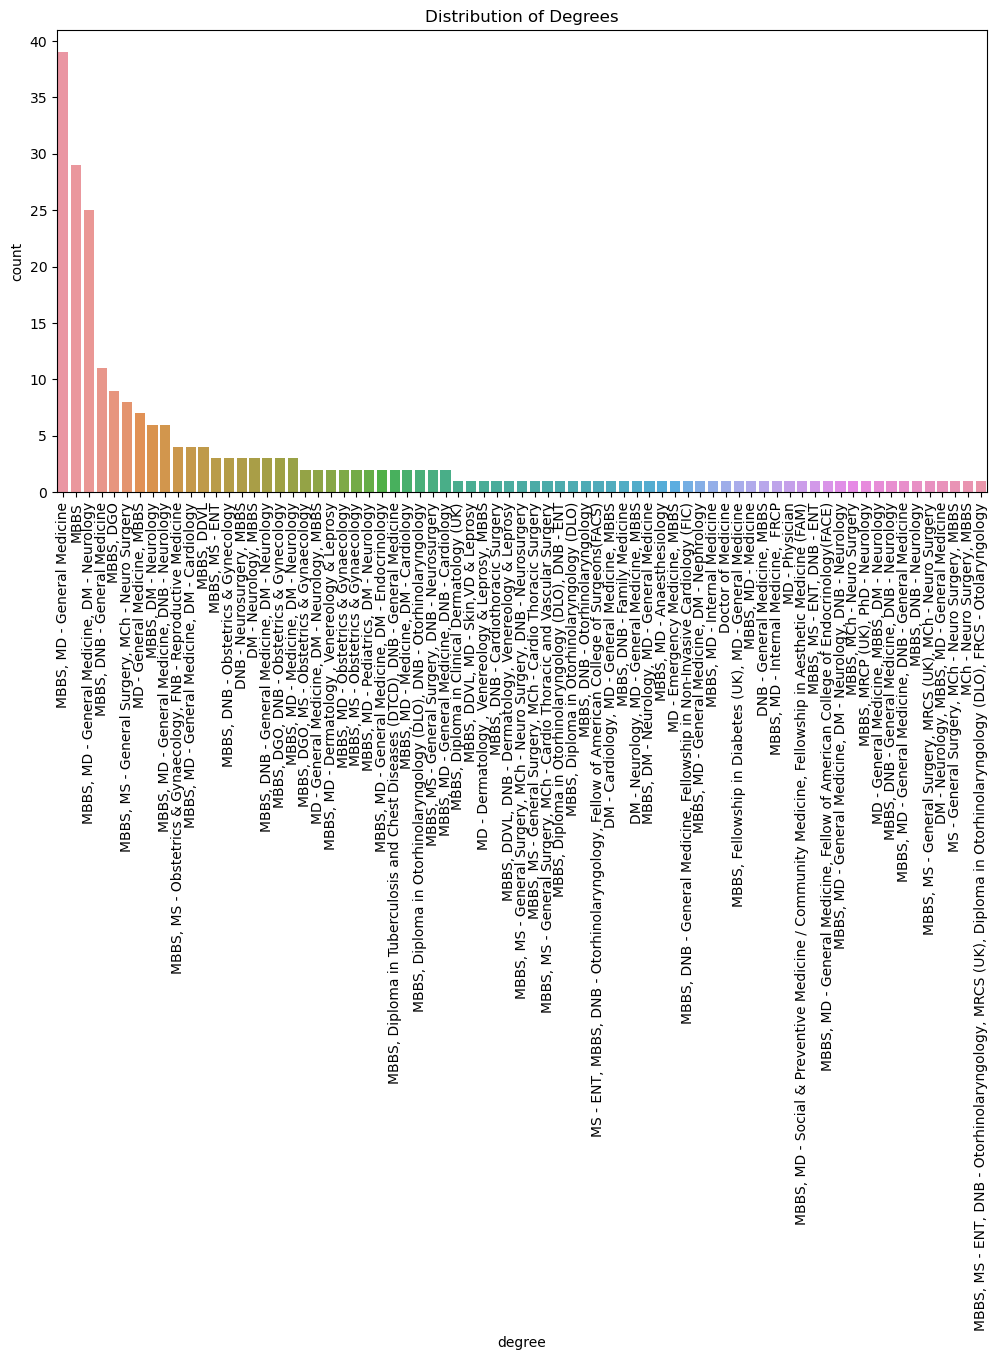

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='degree', order=df['degree'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Degrees")
plt.show()

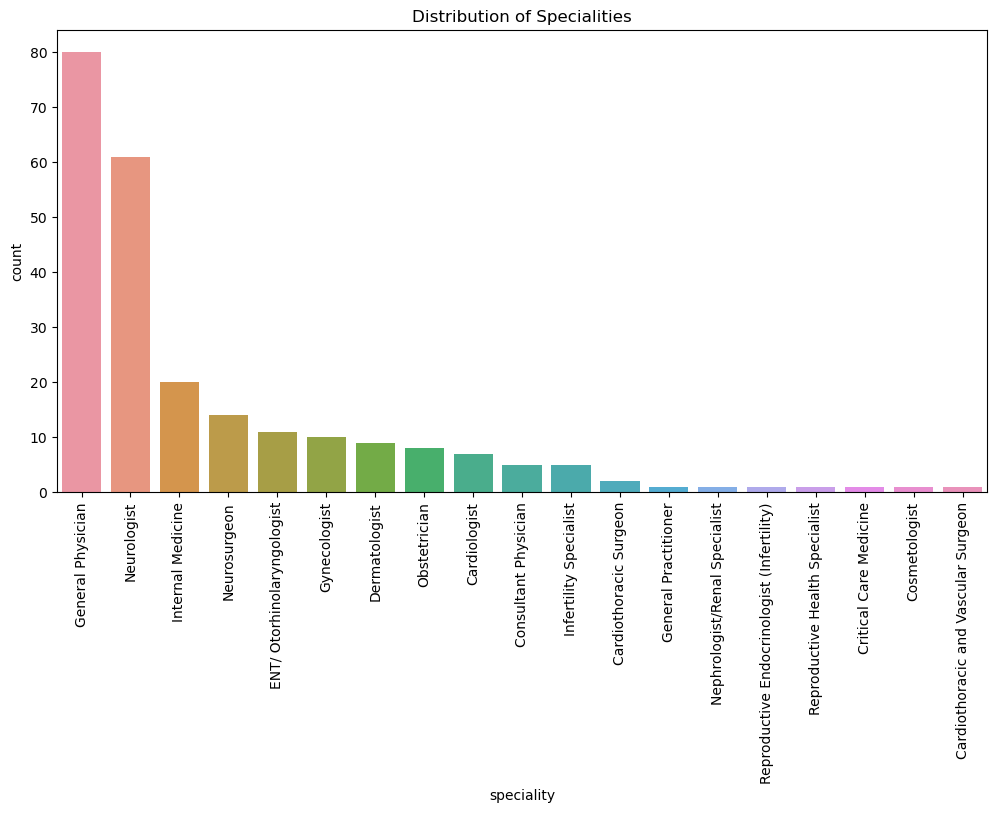

In [20]:
# Distribution of specialities
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='speciality', order=df['speciality'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Specialities")
plt.show()

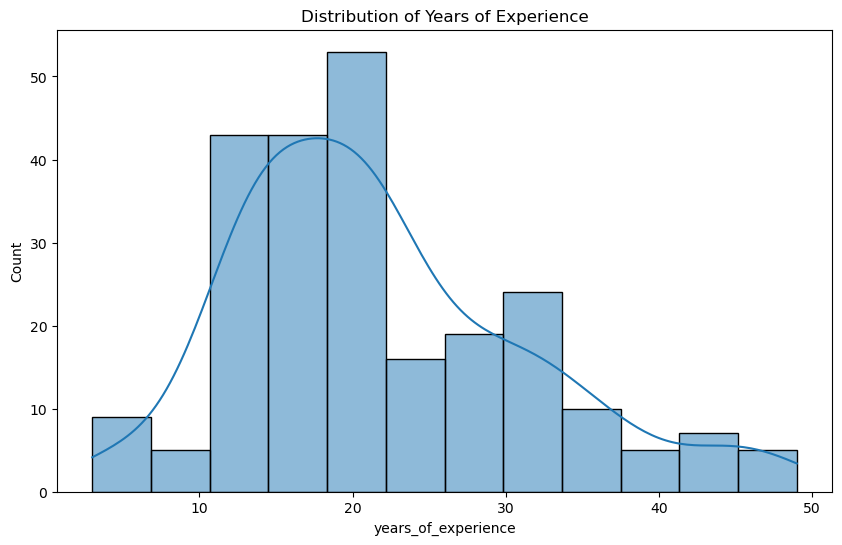

In [21]:
# Distribution of years of experience
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='years_of_experience', kde=True)
plt.title("Distribution of Years of Experience")
plt.show()

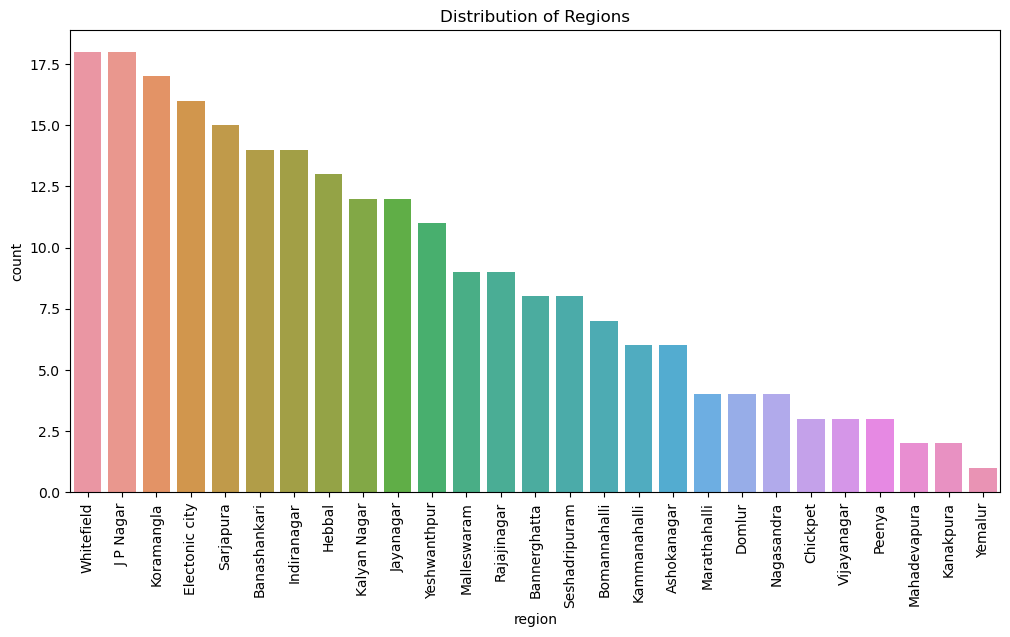

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='region', order=df['region'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Regions")
plt.show()

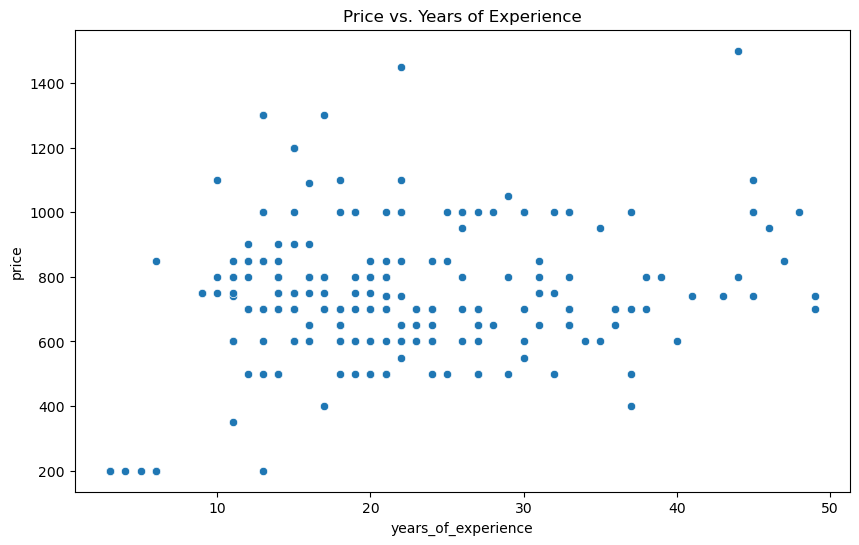

In [23]:
# Relationship between price and years of experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_of_experience', y='price')
plt.title("Price vs. Years of Experience")
plt.show()

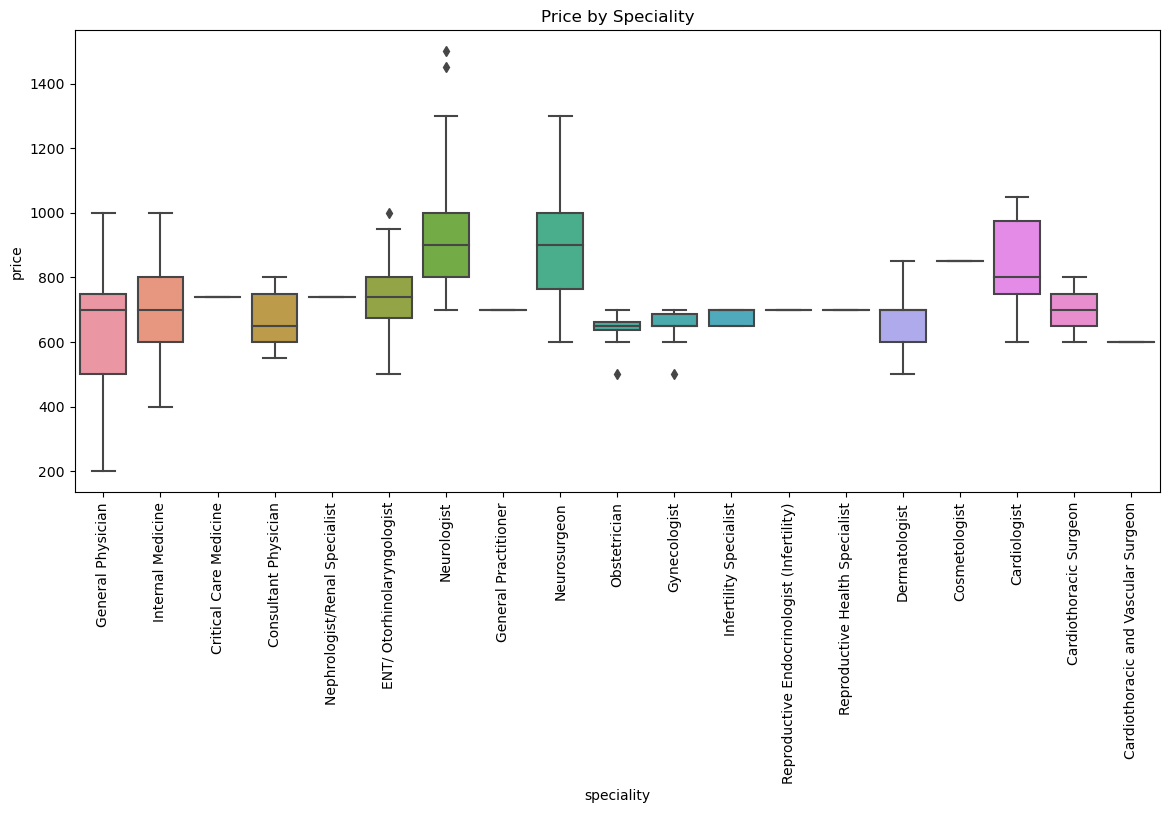

In [24]:
# Boxplot of price by speciality
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='speciality', y='price')
plt.xticks(rotation=90)
plt.title("Price by Speciality")
plt.show()

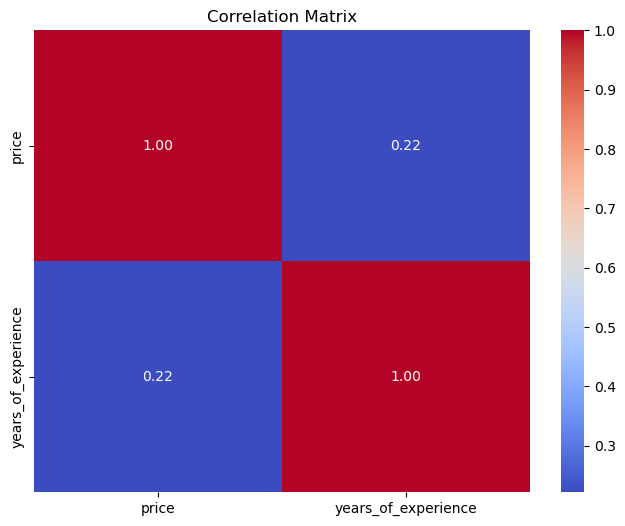

In [25]:
numeric_columns = ['price', 'years_of_experience']
correlation_matrix = df[numeric_columns].corr()
# heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

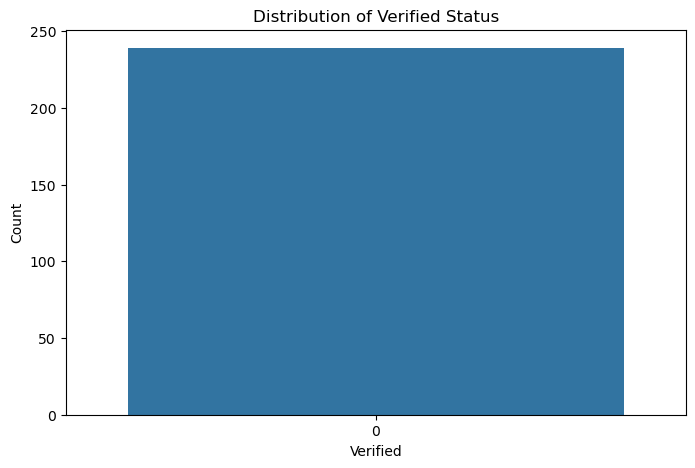

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='verified')
plt.title("Distribution of Verified Status")
plt.xlabel("Verified")
plt.ylabel("Count")
plt.show()

In [27]:
# Insights into pricing
price_stats = df['price'].describe()
print("\nSummary Statistics for Price:\n", price_stats)


Summary Statistics for Price:
 count     239.000000
mean      744.602510
std       209.259772
min       200.000000
25%       650.000000
50%       740.000000
75%       850.000000
max      1500.000000
Name: price, dtype: float64


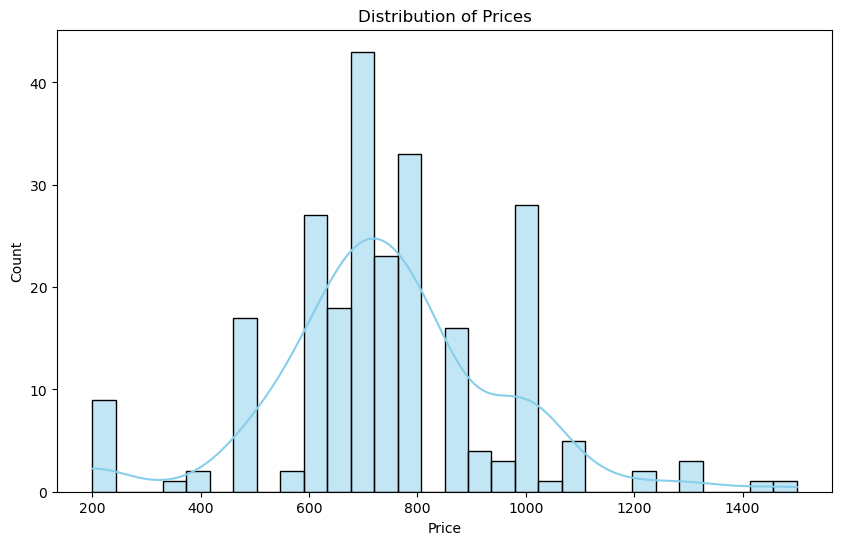

In [28]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True, bins=30, color='skyblue')
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [29]:
# Speciality distribution in a region
target_location = 'Koramangla'  
filtered_df = df[df['region'] == target_location]

# Get insights into the distribution of doctors' specialties in the target location
specialty_distribution = filtered_df['speciality'].value_counts()

# Print the results
print(f"Specialty Distribution in {target_location}:\n{specialty_distribution}")

Specialty Distribution in Koramangla:
speciality
General Physician             8
Neurologist                   6
Dermatologist                 2
ENT/ Otorhinolaryngologist    1
Name: count, dtype: int64


In [30]:
target_location = 'Whitefield' 
target_specialization = 'General Physician' 

# Filter the dataset for the target location and specialization
filtered_df = df[(df['region'] == target_location) & (df['speciality'] == target_specialization)]

verified_doctors = filtered_df[filtered_df['verified'] == 0]
sorted_df = verified_doctors.sort_values(
    by=['price', 'years_of_experience', 'years_as_spec'],
    ascending=[True, False, False]
)

best_doctor = sorted_df.iloc[0]

print(f"Best {target_specialization} in {target_location}:\n")
print(f"Doctor Name: {best_doctor['name']}")
print(f"Degree: {best_doctor['degree']}")
print(f"Pricing: {best_doctor['price']}")
print(f"Years of Experience: {best_doctor['years_of_experience']}")
print(f"Years of Specialization: {best_doctor['years_as_spec']}")

Best General Physician in Whitefield:

Doctor Name: Dr. Kalaivani
Degree: MBBS, MD - General Medicine
Pricing: 500
Years of Experience: 24
Years of Specialization: 20


In [31]:
df

,name,degree,speciality,price,verified,region,years_of_experience,years_as_spec
0,Dr. Kavitha,"MBBS, DNB - Family Medicine",General Physician,750,0,Yeshwanthpur,20,0
1,Dr. Ameena Meah,"MBBS, MD - General Medicine, DNB - General Med...",General Physician,500,0,Hebbal,12,8
2,Dr. Rakshith B Das,MBBS,General Physician,200,0,Malleswaram,3,0
3,Dr. Mohit J,MBBS,General Physician,200,0,Peenya,3,0
4,Dr. Renuka C,MBBS,General Physician,200,0,Koramangla,4,0
...,...,...,...,...,...,...,...,...
234,Dr. Shruti Manjunath,"MBBS, MS - ENT",ENT/ Otorhinolaryngologist,700,0,Indiranagar,13,7
235,Dr. Sampath Chandra Prasad Rao,"MS - ENT, MBBS, DNB - Otorhinolaryngology, Fel...",ENT/ Otorhinolaryngologist,1000,0,Koramangla,22,17
236,Dr. Archana Muralidharan,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",ENT/ Otorhinolaryngologist,800,0,Hebbal,21,17
237,Dr. Shantala M.N,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",ENT/ Otorhinolaryngologist,650,0,Jayanagar,24,23


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['degree'] = label_encoder.fit_transform(df['degree'])
df['speciality'] = label_encoder.fit_transform(df['speciality'])
df['region'] = label_encoder.fit_transform(df['region'])
fee_features = ['degree', 'speciality', 'verified', 'region', 'years_of_experience', 'years_as_spec']
X_fee = df[fee_features]
y_fee = df['price']  # Target variable for fee prediction
target_range = y_fee.max() - y_fee.min()

# Split data into training and testing sets
X_fee_train, X_fee_test, y_fee_train, y_fee_test = train_test_split(X_fee, y_fee, test_size=0.2, random_state=42)

# List of regression models to try
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Evaluate each regression model
for model_name, model in regression_models.items():
    model.fit(X_fee_train, y_fee_train)
    fee_predictions = model.predict(X_fee_test)
    fee_rmse = mean_squared_error(y_fee_test, fee_predictions, squared=False)
    fee_r2 = r2_score(y_fee_test, fee_predictions)
    percentage_accuracy = (1 - (fee_rmse / target_range)) * 100
    print(f"{model_name} Results:")
    print(f"Root Mean Squared Error: {fee_rmse}")
    print(f"R-squared (R2) Score: {fee_r2}")
    print(f"Accuracy percentage: {percentage_accuracy}")
    print("-" * 40)

Linear Regression Results:
Root Mean Squared Error: 188.57715382283172
R-squared (R2) Score: -0.000828604757700413
Accuracy percentage: 85.4940650905514
----------------------------------------
Random Forest Regressor Results:
Root Mean Squared Error: 119.81078485122559
R-squared (R2) Score: 0.5960074258387233
Accuracy percentage: 90.78378578067495
----------------------------------------
Gradient Boosting Regressor Results:
Root Mean Squared Error: 138.1861879145857
R-squared (R2) Score: 0.4625837073008604
Accuracy percentage: 89.37029323733955
----------------------------------------
Support Vector Regressor Results:
Root Mean Squared Error: 187.86613681751174
R-squared (R2) Score: 0.006704276212276983
Accuracy percentage: 85.54875870634525
----------------------------------------
K-Nearest Neighbors Regressor Results:
Root Mean Squared Error: 171.5711708494952
R-squared (R2) Score: 0.1715425912014218
Accuracy percentage: 86.8022176269619
----------------------------------------


In [41]:
# Feature selection for verification prediction
verification_features = ['degree', 'speciality', 'price', 'region', 'years_of_experience', 'years_as_spec']
X_verification = df[verification_features]
y_verification = df['verified']  # Target variable for verification prediction

# Split data into training and testing sets
X_verification_train, X_verification_test, y_verification_train, y_verification_test = train_test_split(X_verification, y_verification, test_size=0.2, random_state=42)

# Classification Model for Verification Prediction
verification_model = RandomForestRegressor(n_estimators=100, random_state=42)
verification_model.fit(X_verification_train, y_verification_train)
verification_predictions = verification_model.predict(X_verification_test)

# Evaluating the verification prediction model
verification_accuracy = accuracy_score(y_verification_test, verification_predictions)
print(f"Accuracy (Verification Prediction) using random forest: {verification_accuracy}")

Accuracy (Verification Prediction) using random forest: 1.0


In [42]:
# Feature selection for fee prediction
fee_features = ['degree', 'speciality', 'verified', 'region', 'years_of_experience', 'years_as_spec']
X_fee = df[fee_features]
y_fee = df['price'] 

# Regression Model for Fee Prediction
fee_model = RandomForestRegressor(n_estimators=100, random_state=42)
fee_model.fit(X_fee_train, y_fee_train)
fee_predictions = fee_model.predict(X_fee_test)

# Evaluating the fee prediction model
fee_rmse = mean_squared_error(y_fee_test, fee_predictions, squared=False)
print(f"Root Mean Squared Error (Fee Prediction): {fee_rmse}")

Root Mean Squared Error (Fee Prediction): 119.81078485122559
